# Scenario

This analysis is done based on the per capita income in Canada from 1970 to 2016. The analysis is done to predict the per capita income from 2017 to 2050. 

In [4]:
#import useful libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [118]:
#load the data
df = pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [116]:
#renaming column for ease of reference
df.rename(columns = {'per capita income (US$)':'incomes'}, inplace = True)
df.head()

,year,incomes
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0.5, 1.0, 'Canada Per Capita Income')

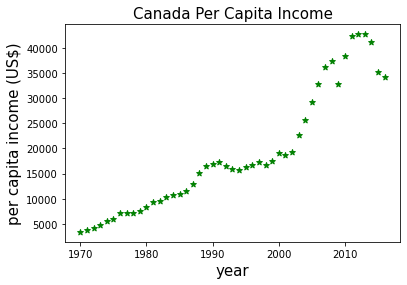

In [28]:
#plotting a scatter graph to determine if the distribution is suitable for a linear regression model
plt.scatter(df.year, df.income,color = 'green', marker = '*')
#name the x and y axis and set the font size
plt.xlabel('year', fontsize = 15)
plt.ylabel('per capita income (US$)', fontsize = 15)
#give the graph a title and also set the font size
plt.title('Canada Per Capita Income', fontsize = 15)

In [31]:
# create linear regression object
reg = linear_model.LinearRegression()
#fit the data
reg.fit(df[['year']], df.income)

LinearRegression()

In [46]:
#making the prediction
reg.predict([[2022]])

array([42945.62424486])

In [40]:
#to get the cofficient(m)
reg.coef_

array([828.46507522])

In [42]:
#to get the intercept(b)
reg.intercept_

-1632210.7578554575

the coefficent and the intercept is used to validate the prediction reult based on the algebraic formula y = m* x+b


In [89]:
#bringning them all together with income as y
income = 828.46507522 * 2022 + -1632210.7578554575
income

42945.62423938257

Text(0.5, 1.0, 'Canada Per Capita Income')

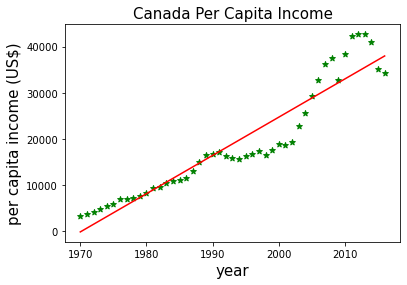

In [104]:
#plotting a graph to show what the line of best fit looks like
plt.scatter(df.year, df.income,color = 'green', marker = '*')
plt.plot(df.year, reg.predict(df[['year']]), color ='red')
#name the x and y axis and set the font size
plt.xlabel('year', fontsize = 15)
plt.ylabel('per capita income (US$)', fontsize = 15)
#give the graph a title and also set the font size
plt.title('Canada Per Capita Income', fontsize = 15)

In [90]:
#to predit for years to come, load the csv file that ontains the years whoce incomes are to be predicted
df2 = pd.read_csv('for income.csv')
df2.head()

,year
0,2017
1,2018
2,2019
3,2020
4,2021


In [91]:
#predicting for the years(2017 - 2050)
incomes = reg.predict(df2)
incomes

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053, 46259.48454575, 47087.94962098, 47916.4146962 ,
       48744.87977142, 49573.34484664, 50401.80992187, 51230.27499709,
       52058.74007231, 52887.20514754, 53715.67022276, 54544.13529798,
       55372.6003732 , 56201.06544843, 57029.53052365, 57857.99559887,
       58686.46067409, 59514.92574932, 60343.39082454, 61171.85589976,
       62000.32097499, 62828.78605021, 63657.25112543, 64485.71620065,
       65314.18127588, 66142.6463511 ])

In [100]:
#creating a new column for the predictd years
df2['incomes'] = incomes
df2.head(
)

,year,incomes
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170


In [101]:
#exporting the predicted output as a csv file
df2.to_csv('prediction.csv', index = False)
df2.head()

,year,incomes
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170


In [117]:
#to concatenate the two dataframes
all_dfs = pd.concat([df, df2])
all_dfs


,year,incomes
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
...,...,...
29,2046,62828.786050
30,2047,63657.251125
31,2048,64485.716201
32,2049,65314.181276
